In [1]:
import os.path

# Importing necessary modules
from data.chittorgarh.utils.transformer import DataTransformer
from data.chittorgarh.utils.transformer.columns import IPOColumn, Metric
import dask.dataframe as dd

/Users/akash/PycharmProjects/IPO-Screener/webscrapper/.venv/lib/python3.9/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Setting variables
config_path = "../chittorgarh/config.local.json"

In [3]:
data_transformer = DataTransformer(config_path)


# Stats per column (numeric + non-numeric)

In [4]:
result = {}
data_transformer.create_bronze()
df = data_transformer.combined()
for col in df.columns:
    series = df[col]

    result[col] = {
        "dtype": str(series.dtype),
        "non_null_count": series.count(),
        "null_count": series.isna().sum(),
        "unique_count": series.nunique(),
    }

stats_df = dd.compute(result)[0]
stats_df

Combining data from ../dataset/chittorgarh/processed/csv/mainboard/gmp.csv into ../dataset/chittorgarh/processed/csv/bronze/mainboard.csv
Combining data from ../dataset/chittorgarh/processed/csv/mainboard/ipo_information.csv into ../dataset/chittorgarh/processed/csv/bronze/mainboard.csv
Combining data from ../dataset/chittorgarh/processed/csv/mainboard/performance_report.csv into ../dataset/chittorgarh/processed/csv/bronze/mainboard.csv
Combining data from ../dataset/chittorgarh/processed/csv/mainboard/subscription.csv into ../dataset/chittorgarh/processed/csv/bronze/mainboard.csv
Combined data saved to ../dataset/chittorgarh/processed/csv/bronze/mainboard.csv
Combining data from ../dataset/chittorgarh/processed/csv/sme/gmp.csv into ../dataset/chittorgarh/processed/csv/bronze/sme.csv
Combining data from ../dataset/chittorgarh/processed/csv/sme/ipo_information.csv into ../dataset/chittorgarh/processed/csv/bronze/sme.csv
Combining data from ../dataset/chittorgarh/processed/csv/sme/perfor

{'pat_margin': {'dtype': 'float64',
  'non_null_count': np.int64(2211),
  'null_count': np.int64(135),
  'unique_count': np.int64(1356)},
 'assets': {'dtype': 'float64',
  'non_null_count': np.int64(2327),
  'null_count': np.int64(19),
  'unique_count': np.int64(2028)},
 'company': {'dtype': 'object',
  'non_null_count': np.int64(2346),
  'null_count': np.int64(0),
  'unique_count': np.int64(2152)},
 'roa': {'dtype': 'float64',
  'non_null_count': np.int64(2318),
  'null_count': np.int64(28),
  'unique_count': np.int64(1304)},
 'pe_multiple_x': {'dtype': 'float64',
  'non_null_count': np.int64(2299),
  'null_count': np.int64(47),
  'unique_count': np.int64(1236)},
 'net_worth': {'dtype': 'float64',
  'non_null_count': np.int64(2305),
  'null_count': np.int64(41),
  'unique_count': np.int64(1850)},
 'roe': {'dtype': 'float64',
  'non_null_count': np.int64(2297),
  'null_count': np.int64(49),
  'unique_count': np.int64(1665)},
 'total_debt': {'dtype': 'float64',
  'non_null_count': np.in

# Column stats(Before removing outliers and Imputation)


In [5]:
stats = df.describe()
count = df.count()
is_na = df.isna().sum()


In [6]:
stats.compute()

,pat_margin,assets,roa,pe_multiple_x,net_worth,roe,total_debt,revenue,enterprise_value,nav,...,allocation_total_ipo_subscription,subscription_anchor_investors,subscription_non_institutional_buyers,allocation_market_maker,allocation_bnii_bids_above_10l,subscription_qib,allocation_retail_individual_investors_riis,subscription_retail_individual_investors_riis,allocation_shareholders,subscription_shareholders
count,2211.000000,2.327000e+03,2318.000000,2299.000000,2305.000000,2297.000000,2328.000000,2330.000000,1262.000000,2130.000000,...,73.0,63.000000,73.000000,55.000000,64.000000,17.000000,73.000000,73.000000,2.000000,2.00000
mean,13.123356,3.987109e+03,7.825397,56.270244,421.272503,17.562582,550.603995,1009.910687,3064.002734,43.532352,...,100.0,55.989048,152.608493,5.574364,12.384219,46.572941,36.695616,97.083014,8.495000,48.47500
std,33.739937,8.820816e+04,18.744087,410.242323,2015.839105,30.758538,4884.941998,14435.878612,20316.881373,66.861050,...,0.0,91.421712,344.345688,0.974873,6.339684,80.256750,11.352189,241.719944,2.128391,54.76542
min,0.020000,6.000000e-02,-78.950000,0.000000,0.010000,-535.090000,0.000000,0.000000,1.260000,-139.150000,...,100.0,1.000000,0.300000,4.920000,8.500000,1.000000,9.970000,0.830000,6.990000,9.75000
25%,3.535000,2.251000e+01,2.260000,12.305000,8.460000,6.140000,2.017500,28.670000,73.132500,15.295000,...,100.0,1.015000,1.530000,5.270000,10.000000,1.560000,35.010000,2.280000,7.742500,29.11250
50%,7.940000,6.274000e+01,5.250000,18.830000,22.750000,12.940000,14.980000,91.270000,166.340000,24.800000,...,100.0,5.330000,8.380000,5.290000,10.020000,9.510000,35.060000,4.910000,8.495000,48.47500
75%,14.855000,2.700000e+02,10.447500,32.400000,108.000000,24.450000,57.957500,323.040000,390.727500,45.947500,...,100.0,64.195000,98.000000,5.360000,10.110000,54.970000,40.330000,30.390000,9.247500,67.83750
max,965.710000,4.090787e+06,541.570000,16600.000000,41829.920000,605.700000,113790.500000,683038.930000,578418.660000,974.530000,...,100.0,327.080000,1612.650000,10.360000,32.970000,256.240000,69.340000,1137.920000,10.000000,87.20000


In [7]:
count.compute()

pat_margin                                       2211
assets                                           2327
company                                          2346
roa                                              2318
pe_multiple_x                                    2299
                                                 ... 
subscription_qib                                   17
allocation_retail_individual_investors_riis        73
subscription_retail_individual_investors_riis      73
allocation_shareholders                             2
subscription_shareholders                           2
Length: 63, dtype: int64

In [8]:
is_na.compute()

pat_margin                                        135
assets                                             19
company                                             0
roa                                                28
pe_multiple_x                                      47
                                                 ... 
subscription_qib                                 2329
allocation_retail_individual_investors_riis      2273
subscription_retail_individual_investors_riis    2273
allocation_shareholders                          2344
subscription_shareholders                        2344
Length: 63, dtype: int64

##

In [9]:
percentage_columns = IPOColumn.get_field_names(Metric.PERCENTAGE)
percentage_columns

['ebitda_margin',
 'pat_margin',
 'roe',
 'roce',
 'roa',
 'pre_issue_promoter_holding',
 'post_issue_promoter_holding',
 'allocation_total_ipo_subscription',
 'allocation_qib',
 'allocation_retail_investors',
 'allocation_employees',
 'allocation_snii_bids_below_10l',
 'allocation_bnii_bids_above_10l']

In [10]:
price_columns = IPOColumn.get_field_names(Metric.PRICE)
price_columns


['eps',
 'nav',
 'ipo_open_gmp',
 'ipo_close_gmp',
 'ipo_allotment_gmp',
 'ipo_listing_gmp',
 'issue_price',
 'face_value',
 'listing_price',
 'listing_gain',
 'current_market_price']

In [11]:
amount_columns = IPOColumn.get_field_names(Metric.AMOUNT)
amount_columns

['assets',
 'net_worth',
 'total_debt',
 'revenue',
 'ebitda',
 'pat',
 'market_capitalisation',
 'enterprise_value',
 'ipo_size']

In [12]:
ratio_columns = IPOColumn.get_field_names(Metric.RATIO)
ratio_columns

['debt_to_equity']

In [13]:
times_columns = IPOColumn.get_field_names(Metric.TIMES)
times_columns

['ev_ebitda',
 'pe_multiple',
 'pb_multiple',
 'subscription',
 'subscription_qib',
 'subscription_retail_investors',
 'subscription_employees',
 'subscription_snii_bids_below_10l',
 'subscription_bnii_bids_above_10l']

In [14]:
count_columns = IPOColumn.get_field_names(Metric.COUNT)
count_columns

[]

In [15]:
date_columns = IPOColumn.get_field_names(Metric.DATE)
date_columns

['dhrp_date', 'open_date', 'close_date', 'allotment_date', 'listing_date']

In [16]:
text_columns = IPOColumn.get_field_names(Metric.TEXT)
text_columns

['company', 'ipo_category', 'exchange', 'issue_type', 'object_of_issue']

## Columns to drop from loaded dataframe

In [17]:
drop_columns = ["issue_price_x", "pe_multiple_x"]
df = df.drop(columns=drop_columns)
rename_columns = {
    "issue_price_y": "issue_price",
    "pe_multiple_y": "pe_multiple",
}
df = df.rename(columns=rename_columns)
# df = df.fillna(0)
df.isna().sum().compute()
# Sorted columns based on null count -> Gives the rarest to most frequent columns

pat_margin                                        135
assets                                             19
company                                             0
roa                                                28
net_worth                                          41
                                                 ... 
subscription_qib                                 2329
allocation_retail_individual_investors_riis      2273
subscription_retail_individual_investors_riis    2273
allocation_shareholders                          2344
subscription_shareholders                        2344
Length: 61, dtype: int64

## Column groups - Feature sets

In [18]:
FEATURE_GROUPS = [
    {
        "group_name": "pricing_capital_structure",
        "feature_list": [
            "issue_price",
            "face_value",
            "assets",
            "net_worth",
            "total_debt",
            "market_capitalisation",
            "enterprise_value",
        ],
        "description": (
            "Pricing and capital-structure related variables describing IPO size, balance-sheet "
            "strength, leverage, and enterprise scale. These features provide structural context "
            "and form the base layer of IPO valuation and risk assessment."
        ),
    },

    {
        "group_name": "profitability_fundamentals",
        "feature_list": [
            "revenue",
            "ebitda",
            "pat",
            "eps",
        ],
        "description": (
            "Core income and earnings-related fundamentals capturing the company’s ability to "
            "generate profits prior to listing. These features directly reflect operating "
            "performance and financial sustainability."
        ),
    },

    {
        "group_name": "efficiency_quality_ratios",
        "feature_list": [
            "roa",
            "roe",
            "roce",
            "ebitda_margin",
            "pat_margin",
            "debt_to_equity",
        ],
        "description": (
            "Efficiency, return, and quality ratios that normalize profitability and capital usage "
            "across firms of different sizes. These features help distinguish high-quality operators "
            "from capital-intensive or inefficient businesses."
        ),
    },

    {
        "group_name": "valuation_multiples",
        "feature_list": [
            "pe_multiple",
            "pb_multiple",
            "ev_ebitda",
        ],
        "description": (
            "Market-derived valuation multiples representing investor expectations embedded in IPO "
            "pricing. These ratios enable relative valuation comparisons but require careful handling "
            "of skewness and extreme values."
        ),
    },

    {
        "group_name": "demand_and_market_sentiment",
        "feature_list": [
            "ipo_open_gmp",
            "ipo_close_gmp",
            "ipo_allotment_gmp",
            "subscription",
            "subscription_qib",
            "subscription_retail_investors",
            "subscription_non_institutional_buyers",
        ],
        "description": (
            "Demand-side and sentiment indicators derived from grey market premiums and subscription "
            "data. These variables capture real investor appetite and market momentum but are "
            "timing-sensitive and should only be used when predictions are made after the "
            "subscription phase."
        ),
    },

    {
        "group_name": "labels",
        "feature_list": [
            "listing_price",
            "listing_gain",
        ],
        "description": (
            "Post-listing outcome variables used exclusively for profitability labeling and model "
            "evaluation. These variables are strictly excluded from training to avoid data leakage."
        ),
    },
]

In [19]:
def remove_outliers_iqr(df, column, factor=1.5):
    q1, q3 = df[column].quantile([0.25, 0.75]).compute()
    iqr = q3 - q1

    lower = q1 - factor * iqr
    upper = q3 + factor * iqr

    return df[(df[column] >= lower) & (df[column] <= upper)]

def remove_outliers_percentile(df, column, low_q=0.01, high_q=0.99):
    low, high = df[column].quantile([low_q, high_q]).compute()
    return df[(df[column] >= low) & (df[column] <= high)]

In [20]:
for feature_group in FEATURE_GROUPS:
    group_name = feature_group["group_name"]
    feature_list = feature_group["feature_list"]
    description = feature_group["description"]

    print(f"Feature Group: {group_name}")
    print(f"Description: {description}")
    new_df = df[feature_list].fillna(0)
    for feature in feature_list:
        new_df = remove_outliers_iqr(new_df, feature, factor=1)
    print(new_df.describe().compute())

Feature Group: pricing_capital_structure
Description: Pricing and capital-structure related variables describing IPO size, balance-sheet strength, leverage, and enterprise scale. These features provide structural context and form the base layer of IPO valuation and risk assessment.
       issue_price  face_value       assets    net_worth   total_debt  \
count  1096.000000      1096.0  1096.000000  1096.000000  1096.000000   
mean     62.827555        10.0    29.425821    11.724370     7.725557   
std      42.851559         0.0    25.164376     9.499357     9.160475   
min       0.000000        10.0     0.000000     0.000000     0.000000   
25%      30.000000        10.0     8.987500     4.307500     0.415000   
50%      51.500000        10.0    24.210000     8.970000     3.645000   
75%      85.000000        10.0    43.840000    17.250000    11.922500   
max     252.000000        10.0   189.790000    43.420000    37.880000   

       market_capitalisation  enterprise_value  
count     

In [27]:
import os
import pandas as pd
gold_dataset_path = "../dataset/chittorgarh/processed/csv/gold/efficiency_quality_ratios.csv"
os.path.exists(gold_dataset_path)
gold_df = dd.read_csv(gold_dataset_path)
gold_df.head()

# ensure numeric
df = gold_df.map_partitions(lambda pdf: pdf.apply(pd.to_numeric, errors="coerce"))

# compute correlation
corr = df.compute().corr(method="spearman")
gold_df.describe().compute()

,roa,roe,roce,ebitda_margin,pat_margin,debt_to_equity
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,7.178382,17.133210,20.762211,21.008909,11.380984,1.108003
std,7.321490,16.845363,10.667399,19.435808,12.125360,1.356731
min,-7.942600,-27.366400,0.084800,0.854100,0.213000,0.000000
25%,2.280000,6.290000,19.690000,8.710000,3.772500,0.350000
50%,5.250000,12.940000,19.690000,15.485000,7.940000,0.760000
75%,10.385000,24.240000,19.690000,25.767500,14.350000,1.327500
max,35.993200,83.700800,79.236000,99.760700,75.760000,9.423600


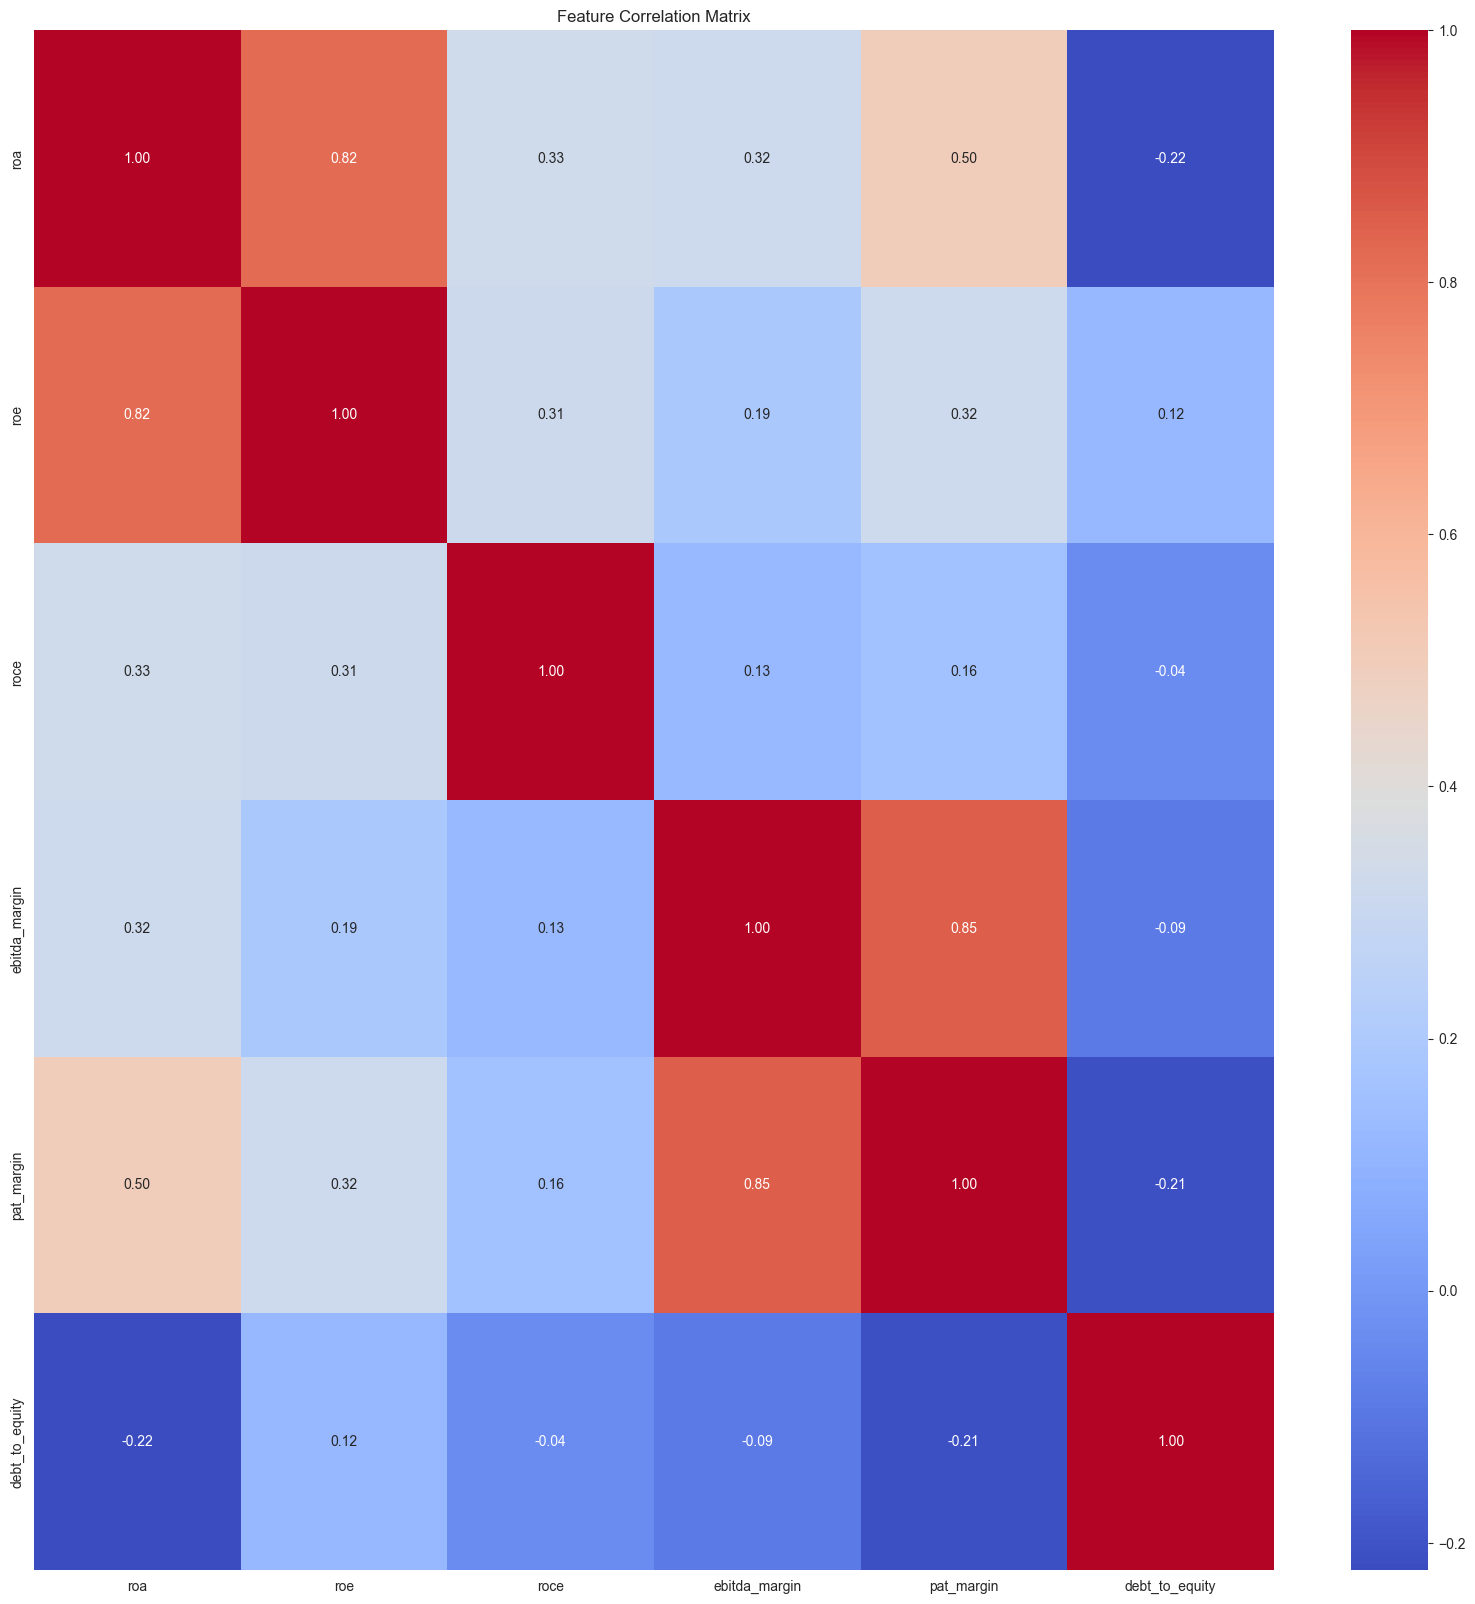

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".02f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [29]:
import numpy as np

threshold = 0.2
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [
    column for column in upper.columns
    if any(upper[column].abs() < threshold)
]

print("Keep these:", to_drop)

Keep these: ['ebitda_margin', 'pat_margin', 'debt_to_equity']


In [30]:
from sklearn.preprocessing import StandardScaler

# standardize (PCA is variance-based!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

for i, v in enumerate(cum_explained[:10], 1):
    print(f"PC{i}: {v:.2%}")

loadings = pd.DataFrame(
    pca.components_.T,
    index=df.columns,
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
)
importance = (
    loadings.abs()
    .mul(pca.explained_variance_ratio_, axis=1)
    .sum(axis=1)
    .sort_values(ascending=False)
)

print(importance)

PC1: 39.45%
PC2: 63.40%
PC3: 81.03%
PC4: 93.15%
PC5: 96.78%
PC6: 100.00%
roe               0.391398
roa               0.363584
ebitda_margin     0.362229
pat_margin        0.346308
roce              0.341944
debt_to_equity    0.234429
dtype: float64


/Users/akash/PycharmProjects/IPO-Screener/webscrapper/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/akash/PycharmProjects/IPO-Screener/webscrapper/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/akash/PycharmProjects/IPO-Screener/webscrapper/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
